<a href="https://colab.research.google.com/github/hritikac25/Scripps/blob/main/Copy_of_outbreak_cases_min.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests

server = 'api.outbreak.info' # or 'dev.outbreak.info'
auth = 'Bearer 0ed52bbfb6c79d1fd8e9c6f267f9b6311c885a4c4c6f037d6ab7b3a40d586ad0' # keep this private!
nopage = 'fetch_all=true&page=0' # worth verifying that this works with newer ES versions as well

def get_outbreak_data(endpoint, argstring, server=server, auth=auth):
    auth = {'Authorization': str(auth)}
    return requests.get(f'https://{server}/{endpoint}?q={argstring}', headers=auth)

In [ ]:
location = 'GBR'
data = get_outbreak_data('covid19/query', f"location_id:{location}&sort=date&fields=date,confirmed_numIncrease&{nopage}")

In [ ]:
import pandas as pd

In [ ]:
raw=data.json()["hits"]

In [ ]:
tableGBR=pd.DataFrame(raw)
tableGBR

,_id,_score,confirmed_numIncrease,date
0,GBR_None_None2021-06-27,8.507395,14623,2021-06-27
1,GBR_None_None2021-06-30,8.507395,25606,2021-06-30
2,GBR_None_None2021-07-03,8.507395,24447,2021-07-03
3,GBR_None_None2021-07-04,8.507395,23818,2021-07-04
4,GBR_None_None2021-07-05,8.507395,27100,2021-07-05
...,...,...,...,...
853,GBR_None_None2020-06-12,8.359817,1053,2020-06-12
854,GBR_None_None2020-06-23,8.359817,882,2020-06-23
855,GBR_None_None2020-06-26,8.359817,638,2020-06-26
856,GBR_None_None2020-06-27,8.359817,633,2020-06-27


In [ ]:
tableGBR.rename(columns = {'_id':'ID', '_score':'score', 'confirmed_numIncrease':'cases'}, inplace = True)
a=tableGBR.drop(columns=['score'], axis=1)
a

,ID,cases,date
0,GBR_None_None2021-06-27,14623,2021-06-27
1,GBR_None_None2021-06-30,25606,2021-06-30
2,GBR_None_None2021-07-03,24447,2021-07-03
3,GBR_None_None2021-07-04,23818,2021-07-04
4,GBR_None_None2021-07-05,27100,2021-07-05
...,...,...,...
853,GBR_None_None2020-06-12,1053,2020-06-12
854,GBR_None_None2020-06-23,882,2020-06-23
855,GBR_None_None2020-06-26,638,2020-06-26
856,GBR_None_None2020-06-27,633,2020-06-27


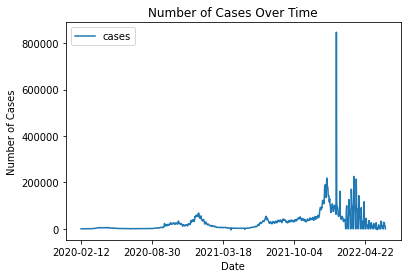

In [ ]:
a = a.sort_values(by="date")
lines = a.plot.line(x='date', y='cases', title='Number of Cases Over Time', xlabel='Date', ylabel='Number of Cases')